# **Iris Flower Classification**
Author: Muhammad Hassaan

## Import Libraries

In [53]:
# import libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Load the Data

In [54]:
# import the data
df = sns.load_dataset("iris")

# show the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
# show the tail of the data
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Exploratory Data Analysis

### 1. Data Overview

In [56]:
# show the shape of the data
df.shape

(150, 5)

In [57]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
# show the summary statistics of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
# Check if there any missing values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

So, Dataset is fine. No missing values found.

### 2. Data Distribution

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

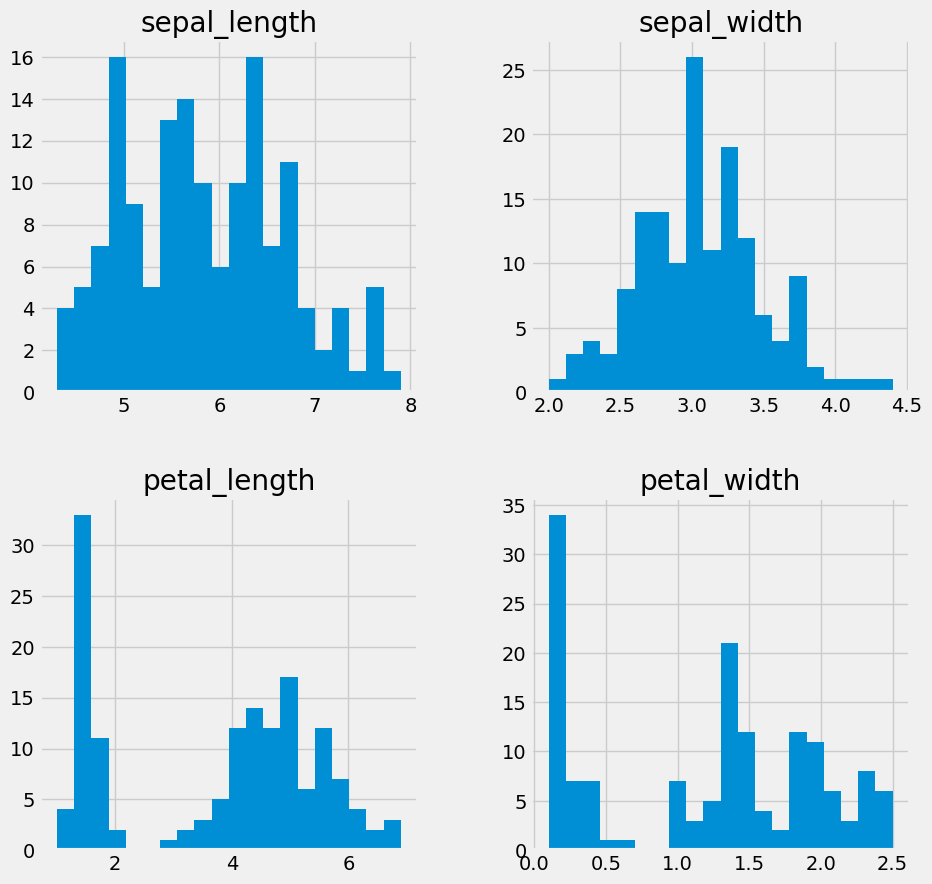

In [60]:
# univariate analysis (histograms)
df.hist(figsize=(10,10), bins=20)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

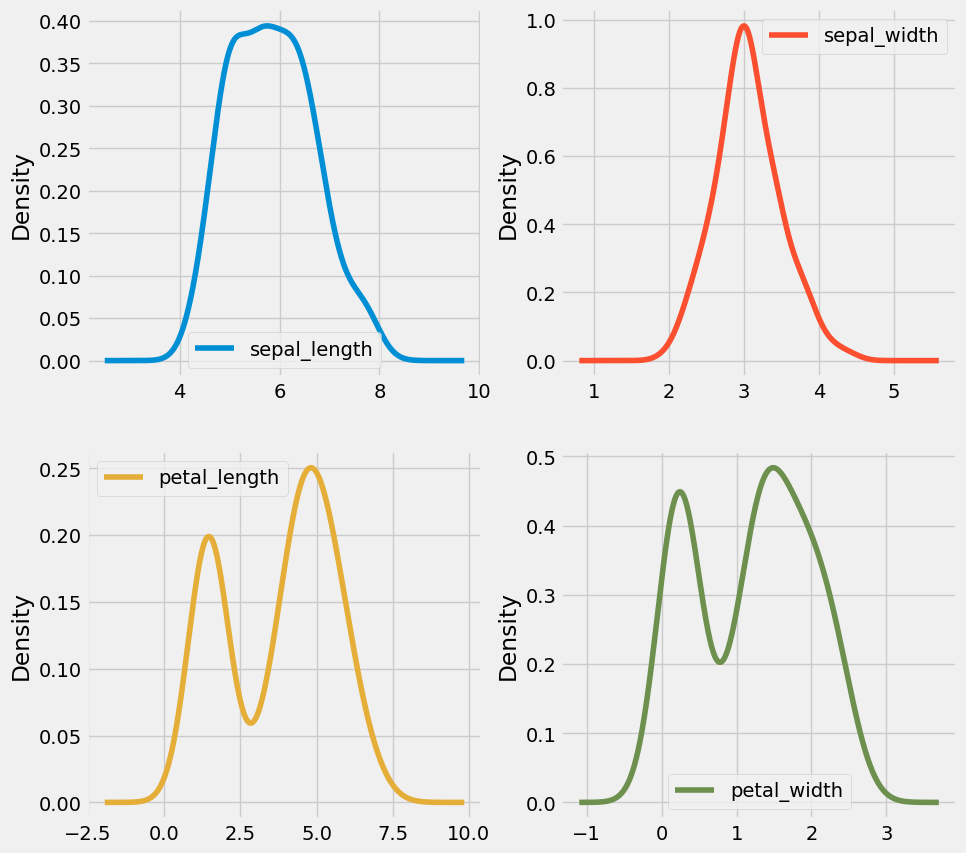

In [61]:
# kernel density estimation (KDE) through pandas
df.plot(kind="kde", subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False, sharey=False)

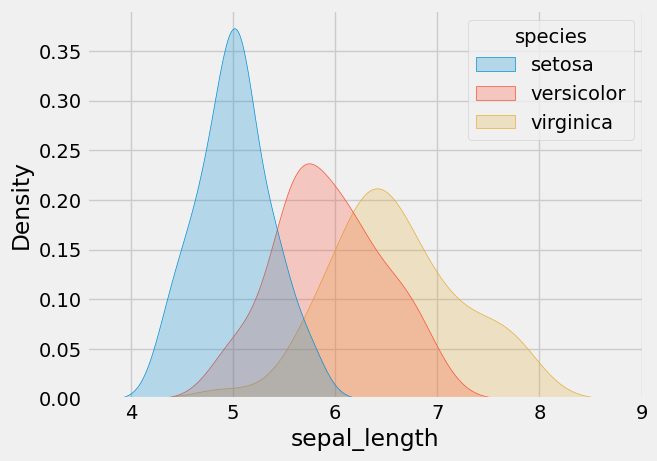

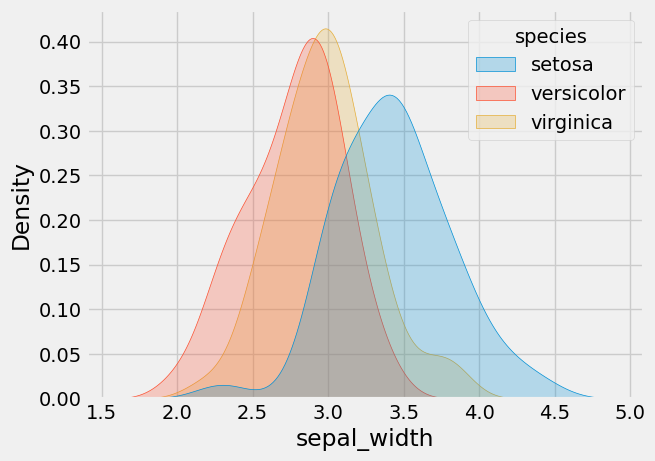

In [62]:
# kernel density estimation (KDE) through seaborn 
sns.kdeplot(data=df, x="sepal_length", hue="species", fill=True)
plt.show()
sns.kdeplot(data=df, x="sepal_width", hue="species", fill=True)
plt.show()

### 3. Relationship Between Features

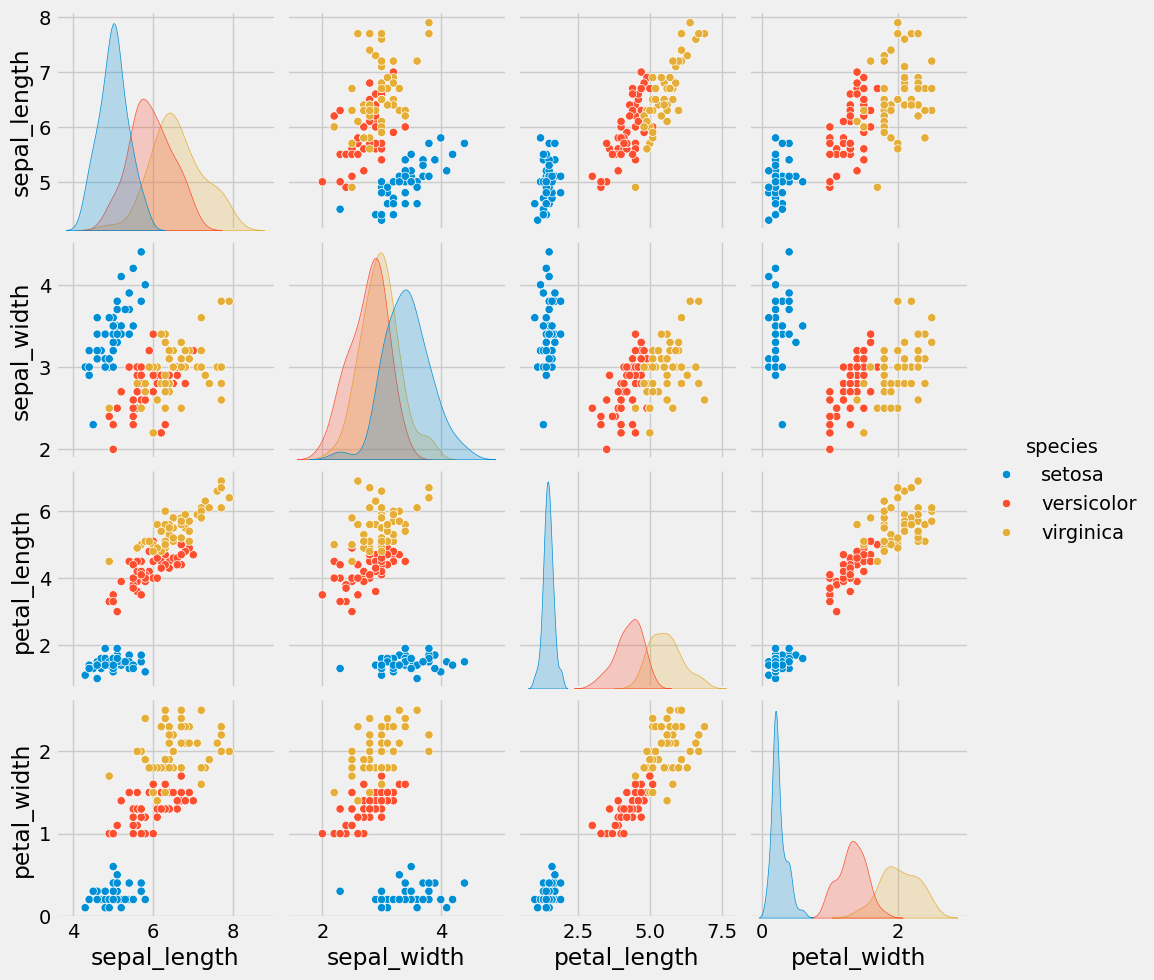

In [63]:
# pairwise plot of all features
sns.pairplot(df, hue="species")

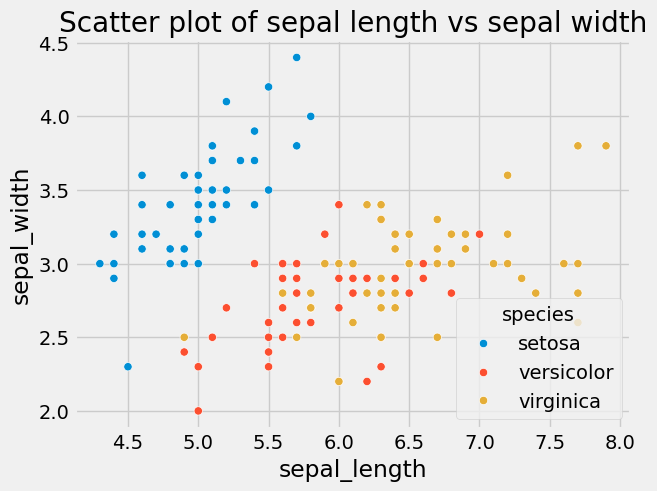

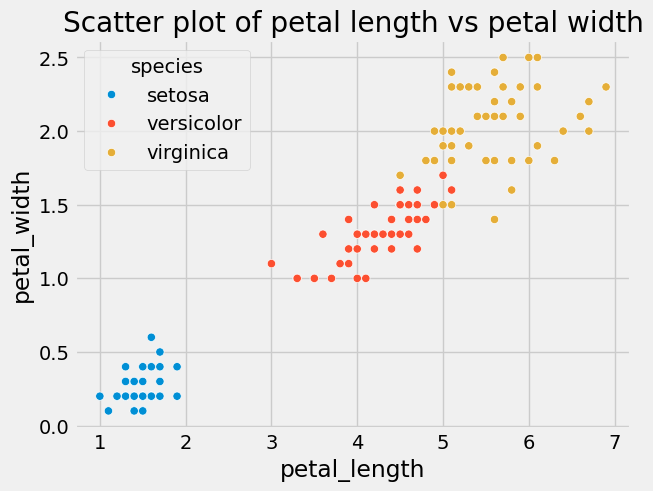

In [64]:
# Scatter plot
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Scatter plot of sepal length vs sepal width")
plt.show()

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Scatter plot of petal length vs petal width")
plt.show()

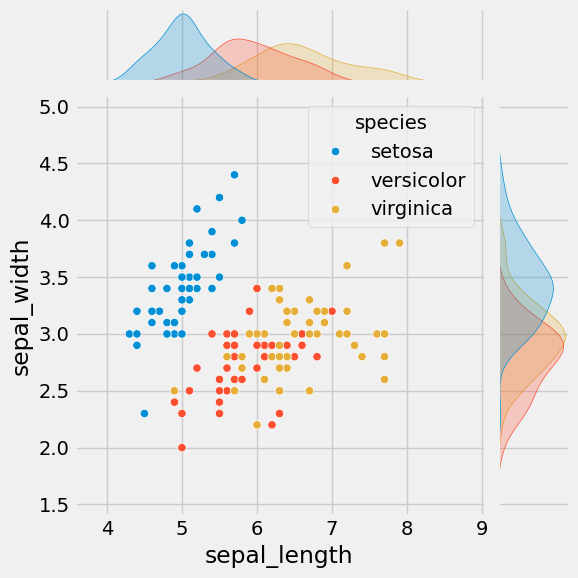

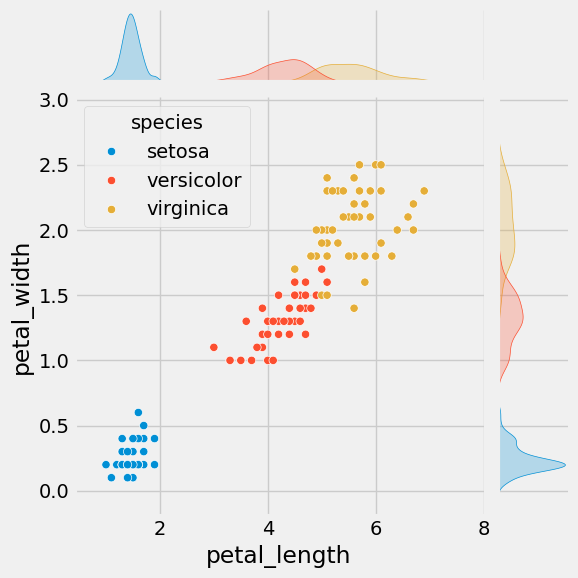

In [65]:
# joinplot
def plot_joint(x, y):
    sns.jointplot(data=df, x=x, y=y, hue="species")

plot_joint("sepal_length", "sepal_width")
plot_joint("petal_length", "petal_width")

### 4. Categorical Variable Analysis

<Axes: xlabel='species', ylabel='count'>

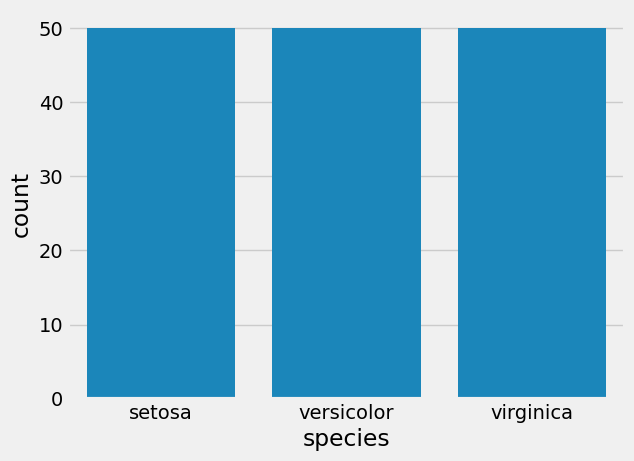

In [66]:
# countplot
sns.countplot(data=df, x="species")

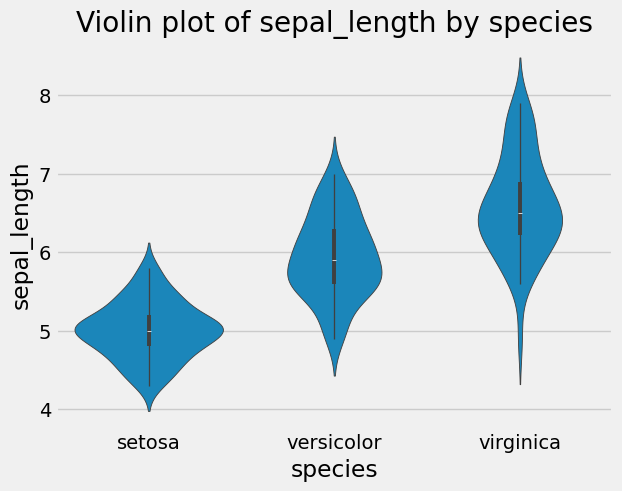

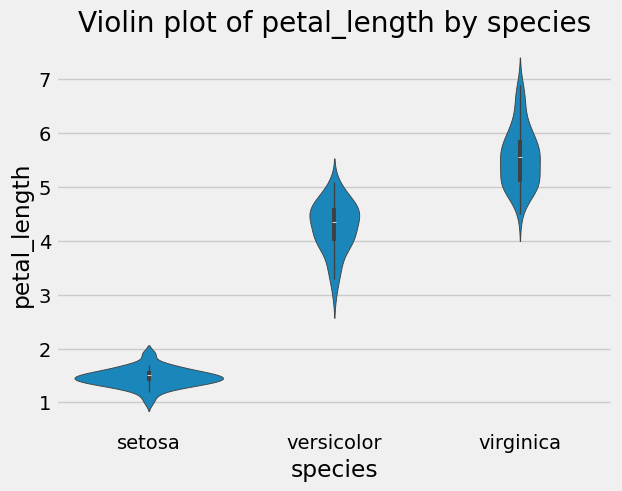

In [67]:
# violon plot
def plot_violin(y):
    sns.violinplot(data=df, x="species", y=y)
    plt.title(f"Violin plot of {y} by species")
    plt.show()

plot_violin("sepal_length")
plot_violin("petal_length")

### 5. Pairwise feature interactions by class

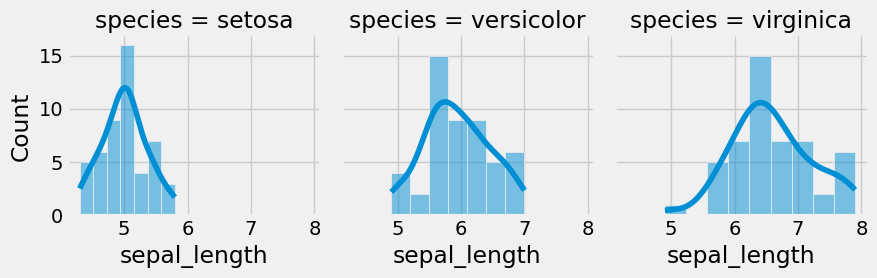

In [68]:
# facetgrid
g = sns.FacetGrid(df, col='species')
g.map(sns.histplot, 'sepal_length', kde=True)

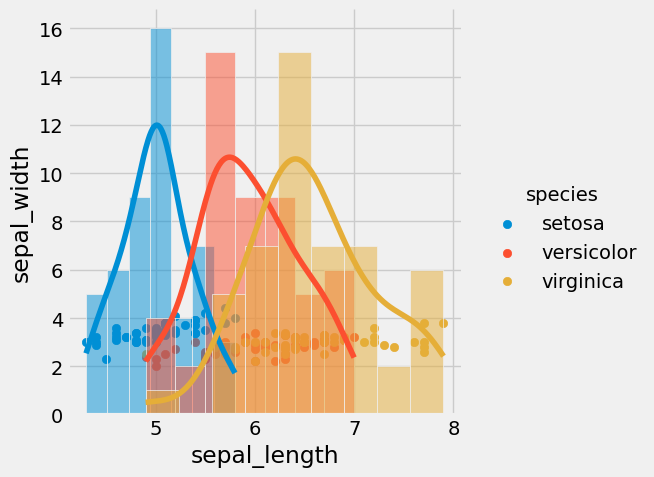

In [69]:
# facetgrid 
g = sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
g.map(sns.histplot, 'sepal_length', kde=True)

### 6. Encoding of Categorical Features

In [70]:
# check the unique values in the target variable
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [71]:
# check the count of each class
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [72]:
# initialize the label encoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [73]:
# convert the encoded values to float
df["species"] = df["species"].astype(float)

### 7. Correlation Between Features

<Axes: >

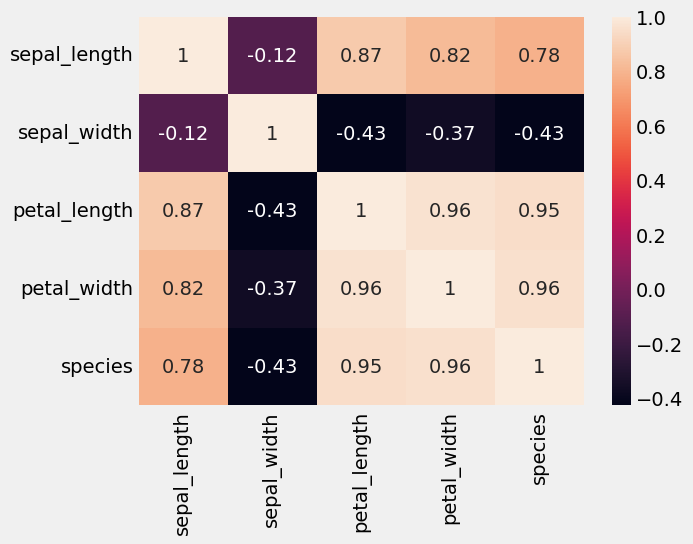

In [74]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

### 8. More Plotting

<Axes: xlabel='species', ylabel='sepal_length'>

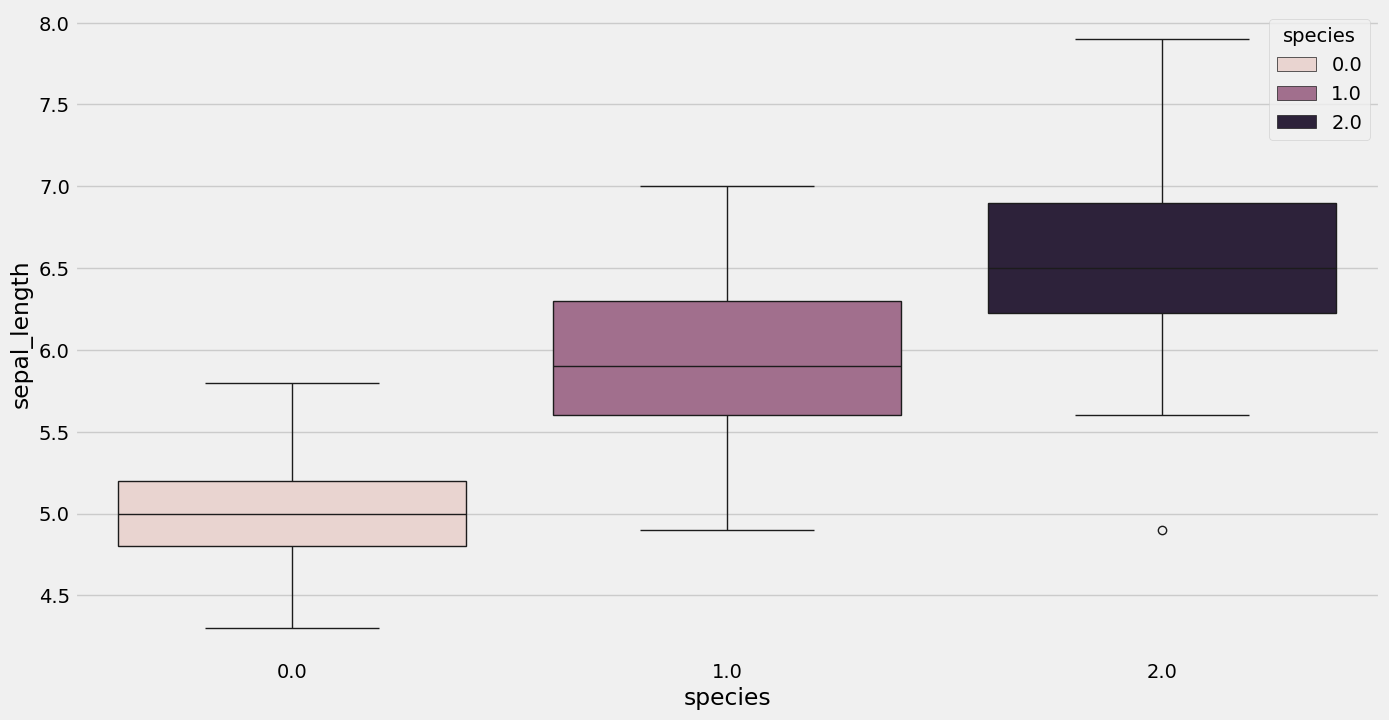

In [75]:
# relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='species', y='sepal_length', data=df.sort_values('sepal_length', ascending=False), hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

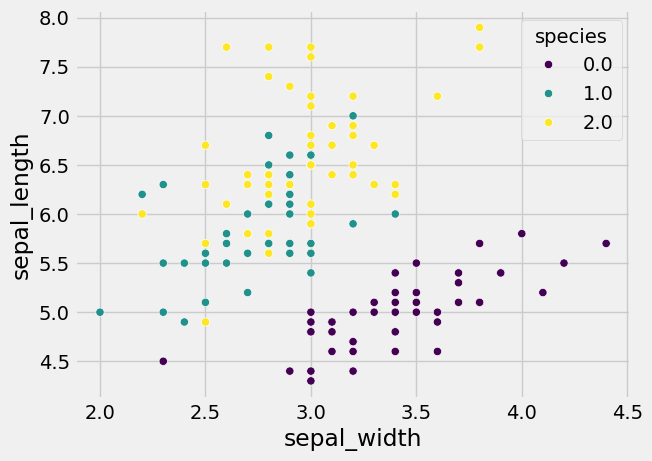

In [79]:
# Relationship between species and sepal width
sns.scatterplot(df, x='sepal_width', y='sepal_length', hue='species', palette='viridis')

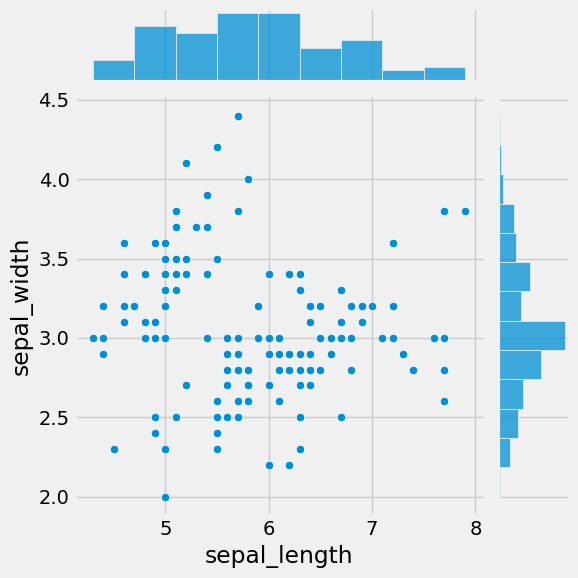

In [87]:
# Relationship between sepal_width and sepal_length
sns.jointplot(df, x='sepal_length', y='sepal_width')

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

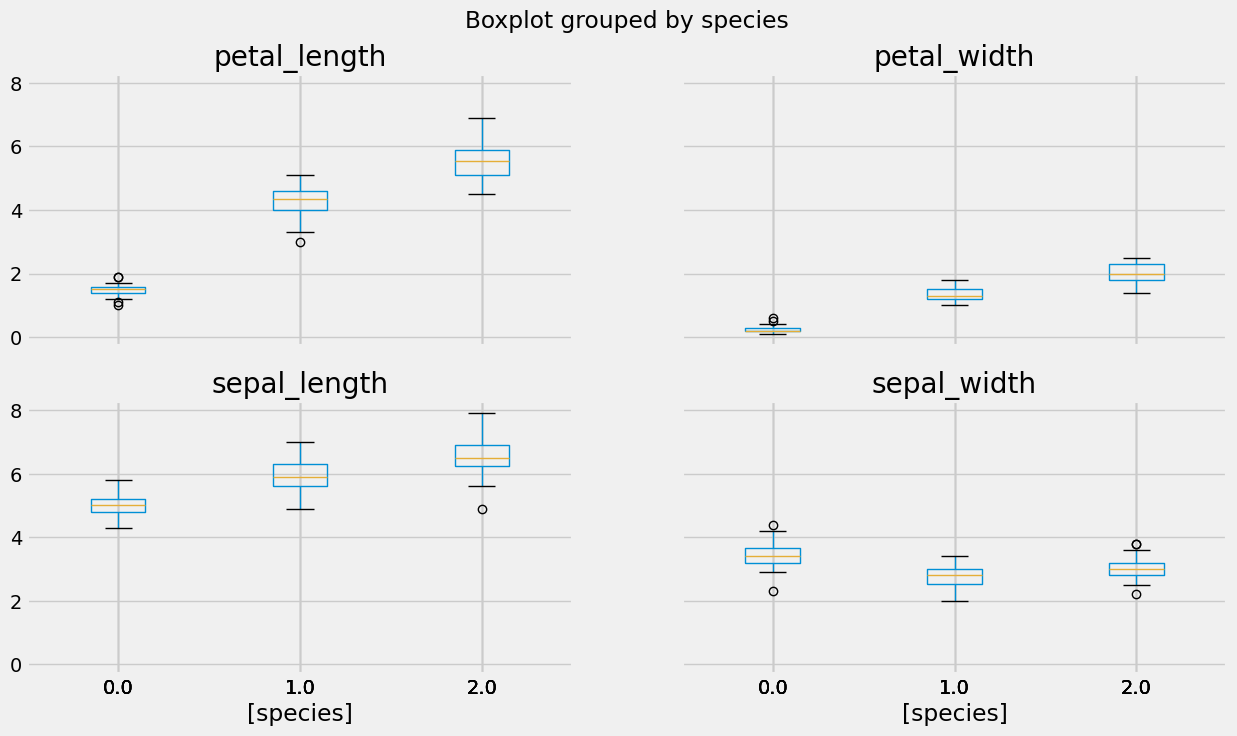

In [93]:
# boxplot
df.boxplot(by='species', figsize=(15, 8))

<Axes: >

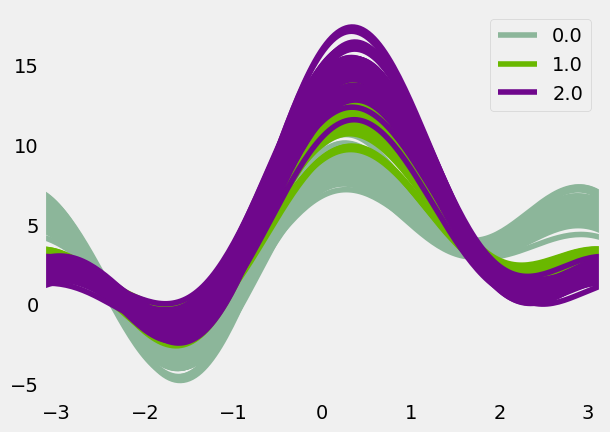

In [94]:
# Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')

<Figure size 1500x1500 with 0 Axes>

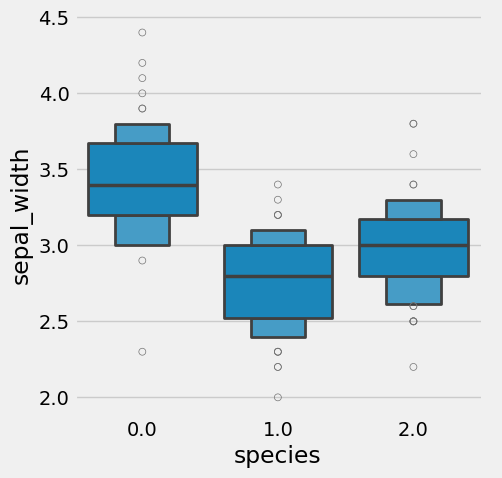

In [98]:
# categorical plot
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<Axes: xlabel='species', ylabel='sepal_width'>

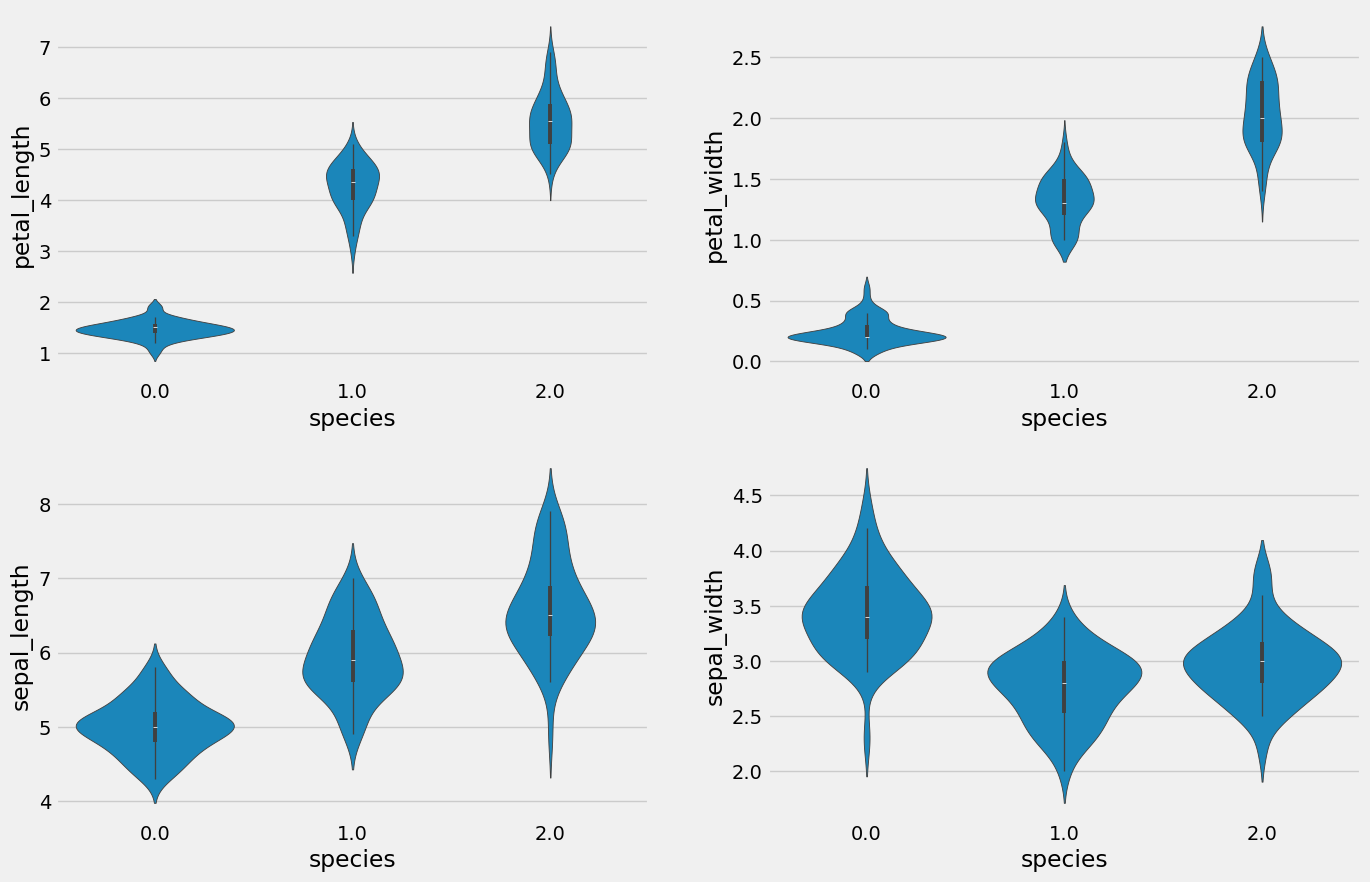

In [99]:
# violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

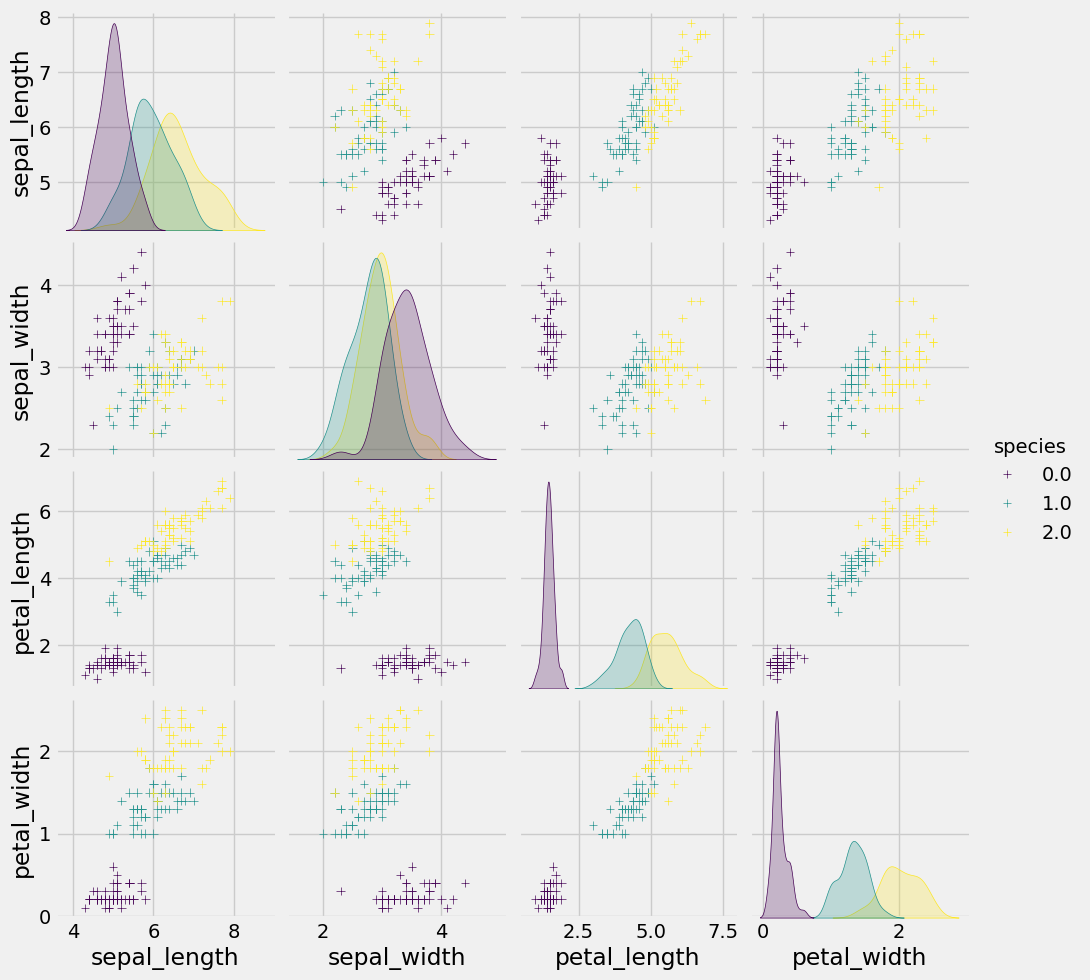

In [102]:
g = sns.pairplot(df, hue='species', markers='+', palette='viridis')
plt.show()

### Insights from EDA

1. 